## This is my final project for the Data Science bootcamp.

## The dataset was provided to me to explore, clean, model and analyse.

# Dataset information and issue to solve

* Business type: Call center
* Optimice call agents times by try to predict which clients are more likely to adquire credit
* Dataset: 179,823 leads
* Reach: 40%-60% of dataset
* Sales / Conversion Ratio: 0.1%



#Importar Libraries + data upload

In [1]:
# Import lib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.filterwarnings('ignore')

# Main libs

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

# For visualizations
import seaborn as sns

In [2]:
df = pd.read_excel('/content/drive/MyDrive/Machine Learning/BD_PPL_DEMO.xlsx')

In [3]:
df.head()

,producto,CantidadGestiones,CantidadGestiones_Dis,LINEA,RNG_LINEA_PLD,ZONA,SCORE_AZTECA,PROP_AZTECA,SCORE_Q_MIL,GRUPO_RIESGO,...,Color_gestion,Campaña,PEER,GEST_ANT_STOCK,Tasa_7,Tasa_12M,Tasa_18M,Tasa_24M,Tasa_36M,VTA
0,EXC,0,3,4300,b.2500 a 5000,PROV,355,1,229596,G1,...,Verde,SOLODNI,SIN DEUDA,NEW,999,83.7,83.7,83.7,84,NO
1,EXC,0,14,6200,c.5001 a 7500,LIMA,323,4,127119,G1,...,Verde,SOLODNI,SIN DEUDA,6M,999,83.7,83.7,75.0,75,NO
2,EXC,3,13,11900,e.10001 a 20000,PROV,361,2,627525,G1,...,Verde,SOLODNI,SIN DEUDA,6M,999,75.0,71.0,67.0,67,NO
3,EXC,1,27,8900,d.7501 a 10000,LIMA,338,4,228109,G1,...,Verde,SD FCP,SIN DEUDA,6M,999,83.7,72.0,68.0,68,NO
4,EXC,0,20,4000,b.2500 a 5000,PROV,361,4,396977,G1,...,Verde,SOLODNI,SIN DEUDA,NEW,999,83.7,83.7,83.7,84,NO


## Exploratory Data Analysis

In [5]:
df.describe()

,CantidadGestiones,CantidadGestiones_Dis,LINEA,SCORE_AZTECA,PROP_AZTECA,SCORE_Q_MIL,FECHA_CARGA,EDAD_ID,NUM_TC,Tasa_7,Tasa_12M,Tasa_18M,Tasa_24M,Tasa_36M
count,179823.000000,179823.000000,179823.000000,179823.000000,179823.000000,1.798230e+05,1.798230e+05,179823.000000,146839.000000,179823.000000,179823.000000,179823.000000,179823.000000,179823.000000
mean,0.443125,9.187529,12476.058563,249.984746,3.340073,1.022900e+06,2.022111e+07,45.468995,1.831741,862.565167,74.854491,72.781444,71.525761,69.706367
std,0.945778,11.817560,9394.619997,167.566817,1.141871,2.560338e+06,7.803822e+00,12.617613,1.637370,331.481321,12.232506,12.707872,12.800681,12.603193
min,0.000000,0.000000,1500.000000,0.000000,1.000000,7.108700e+04,2.022110e+07,0.000000,0.000000,53.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,5300.000000,129.000000,2.000000,2.254790e+05,2.022110e+07,35.000000,1.000000,999.000000,67.000000,64.000000,60.000000,58.000000
50%,0.000000,5.000000,8800.000000,281.000000,4.000000,2.663980e+05,2.022111e+07,44.000000,1.000000,999.000000,83.700000,75.000000,72.000000,71.000000
75%,1.000000,11.000000,15400.000000,361.000000,4.000000,3.969770e+05,2.022112e+07,55.000000,3.000000,999.000000,83.700000,83.700000,83.700000,84.000000
max,30.000000,223.000000,40000.000000,697.000000,4.000000,9.999999e+06,2.022112e+07,105.000000,10.000000,999.000000,83.700000,83.700000,83.700000,84.000000


In [6]:
df0 = pd.DataFrame(df.isna().sum(), columns=['col'])
df0.sort_values(by='col', ascending=False, na_position='first')

,col
NUM_TC,32984
DISTRITO_ID,7802
PROVINCIA_ID,7802
DEPARTAMENTO_ID,7802
producto,0
Color_gestion,0
RNG_EDAD,0
RNG_CANTIDADTC,0
RNG_APALANCAMIENTO,0
Campaña,0


In [7]:
df.columns

Index(['producto', 'CantidadGestiones', 'CantidadGestiones_Dis', 'LINEA',
       'RNG_LINEA_PLD', 'ZONA', 'SCORE_AZTECA', 'PROP_AZTECA', 'SCORE_Q_MIL',
       'GRUPO_RIESGO', 'FECHA_CARGA', 'DEPARTAMENTO_ID', 'PROVINCIA_ID',
       'DISTRITO_ID', 'REGIMEN_LABORAL', 'RNG_SALDO_TC_ENTRE_INGRESO',
       'RNG_INGRESO', 'RNG_SALDO_CONSUMO', 'RNG_LIN_CENCO_ENTRE_LIN_MAX',
       'RNG_SALDO_TC', 'EDAD_ID', 'RNG_EDAD', 'NUM_TC', 'RNG_CANTIDADTC',
       'RNG_APALANCAMIENTO', 'Color_gestion', 'Campaña', 'PEER',
       'GEST_ANT_STOCK', 'Tasa_7', 'Tasa_12M', 'Tasa_18M', 'Tasa_24M',
       'Tasa_36M', 'VTA'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179823 entries, 0 to 179822
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   producto                     179823 non-null  object 
 1   CantidadGestiones            179823 non-null  int64  
 2   CantidadGestiones_Dis        179823 non-null  int64  
 3   LINEA                        179823 non-null  int64  
 4   RNG_LINEA_PLD                179823 non-null  object 
 5   ZONA                         179823 non-null  object 
 6   SCORE_AZTECA                 179823 non-null  int64  
 7   PROP_AZTECA                  179823 non-null  int64  
 8   SCORE_Q_MIL                  179823 non-null  int64  
 9   GRUPO_RIESGO                 179823 non-null  object 
 10  FECHA_CARGA                  179823 non-null  int64  
 11  DEPARTAMENTO_ID              172021 non-null  object 
 12  PROVINCIA_ID                 172021 non-null  object 
 13 

In [9]:
df.shape

(179823, 35)

In [10]:
## For cualitative variables
def plot_cat(feature):
  sns.countplot(data=df,x=feature)
  ax=sns.countplot(data=df,x=feature)

## For cuantitative variables
def plot_num(feature):
    fig,axes=plt.subplots(1,2)
    sns.boxplot(data=df,x=feature,ax=axes[0])
    sns.distplot(a=df[feature],ax=axes[1],color='#ff4125')
    fig.set_size_inches(15,5)

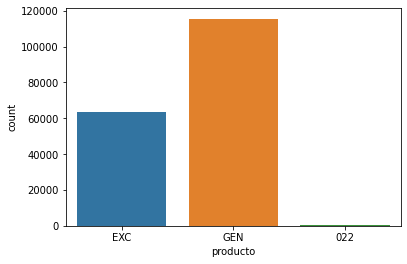

In [11]:
plot_cat('producto')

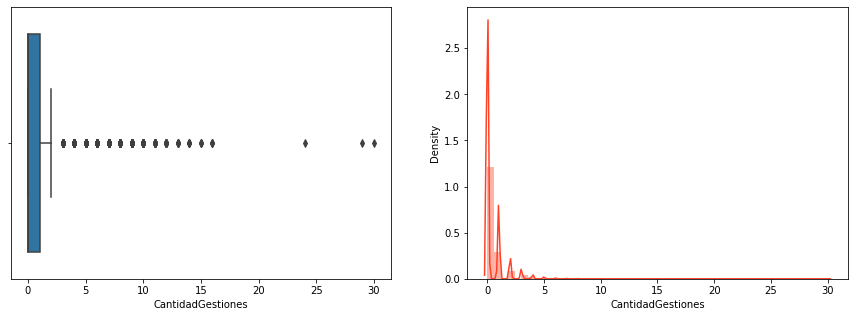

In [12]:
plot_num('CantidadGestiones')

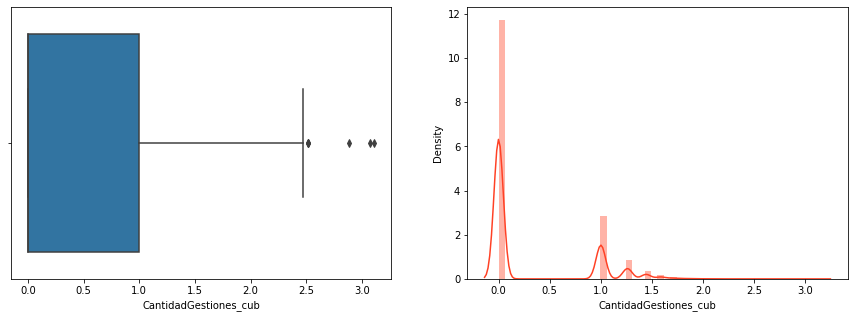

In [89]:
df['CantidadGestiones_cub'] = np.power((df['CantidadGestiones']),1/3)
plot_num('CantidadGestiones_cub')

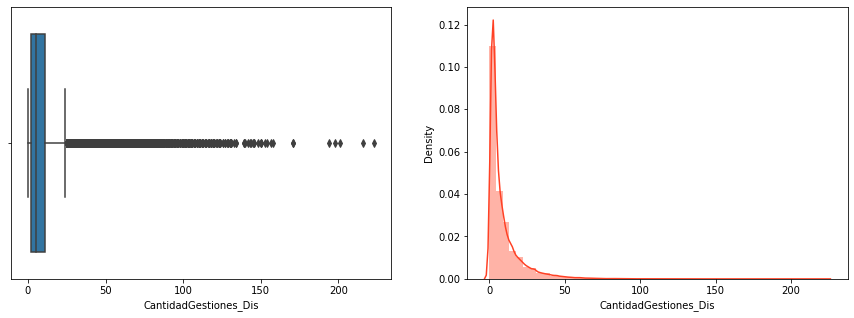

In [13]:
plot_num('CantidadGestiones_Dis')

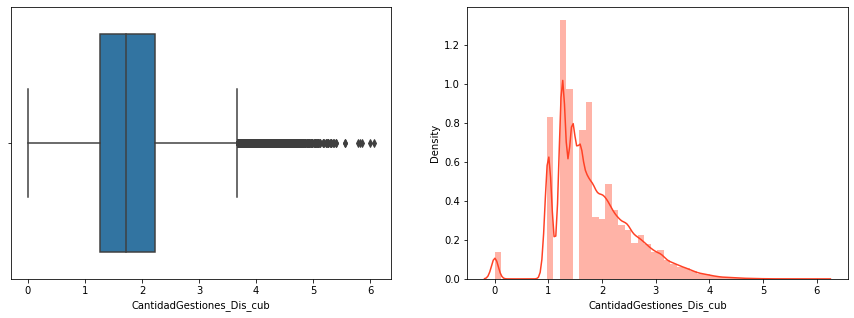

In [92]:
df['CantidadGestiones_Dis_cub'] = np.power((df['CantidadGestiones_Dis']),1/3)
plot_num('CantidadGestiones_Dis_cub')

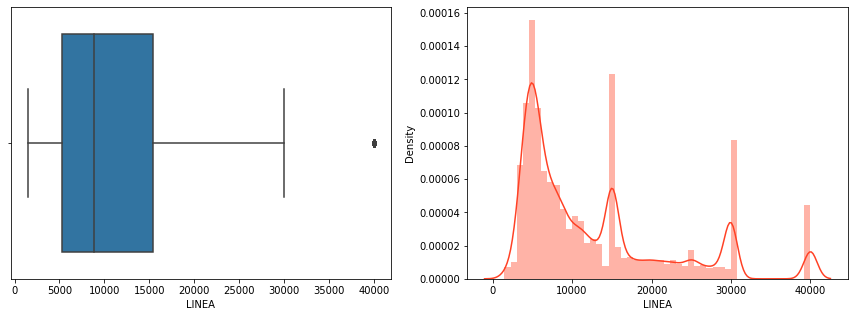

In [14]:
plot_num('LINEA')

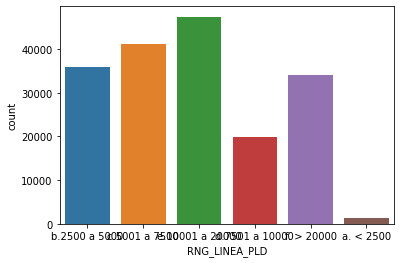

In [15]:
plot_cat('RNG_LINEA_PLD')

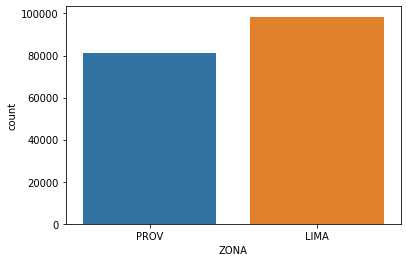

In [16]:
plot_cat('ZONA')

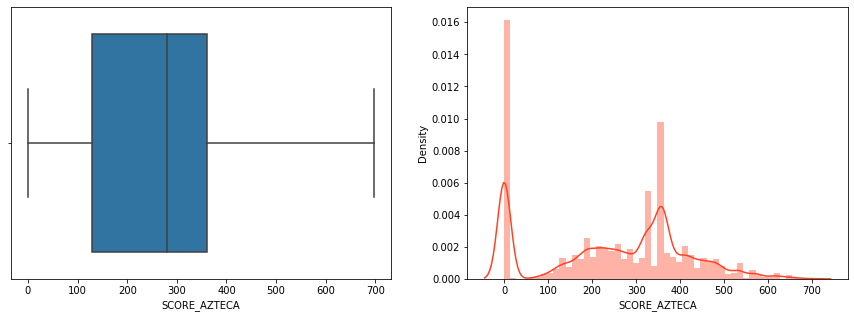

In [17]:
plot_num('SCORE_AZTECA')

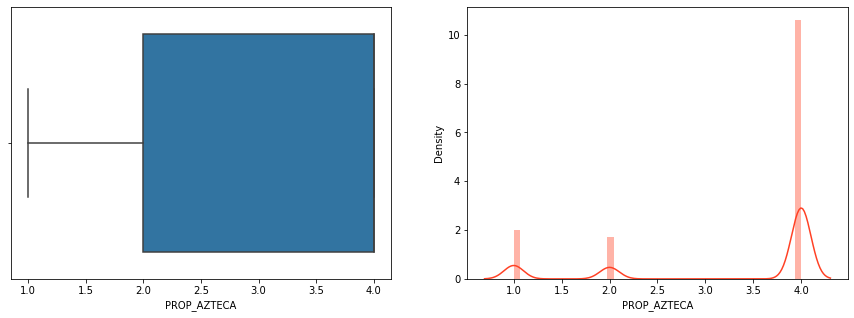

In [18]:
plot_num('PROP_AZTECA')

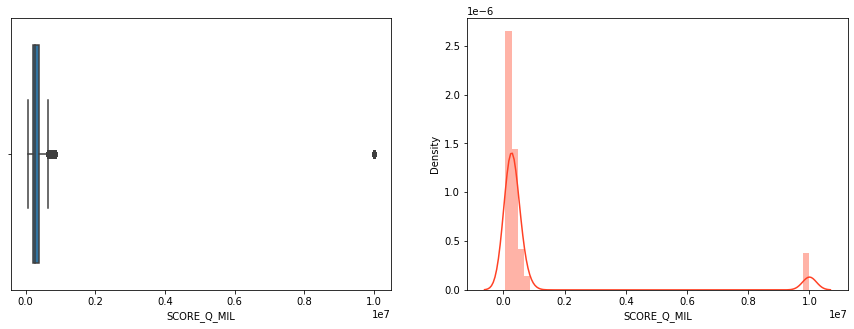

In [19]:
plot_num('SCORE_Q_MIL')

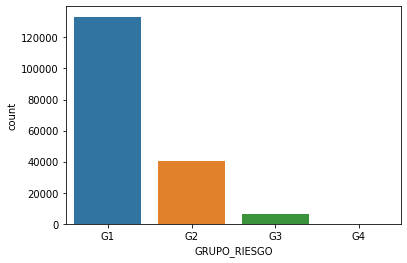

In [20]:
plot_cat('GRUPO_RIESGO')

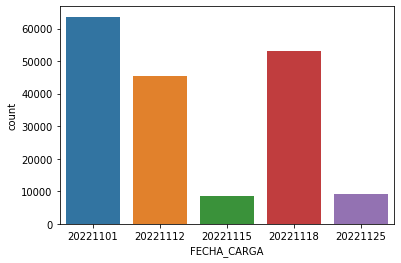

In [21]:
plot_cat('FECHA_CARGA')

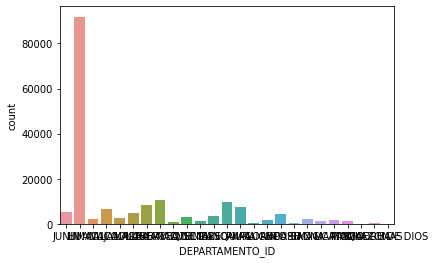

In [22]:
plot_cat('DEPARTAMENTO_ID')

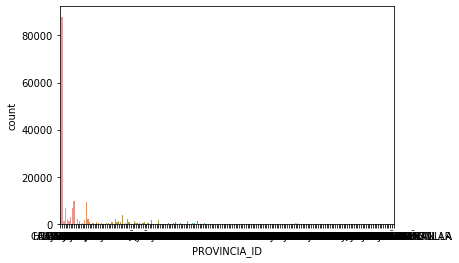

In [23]:
plot_cat('PROVINCIA_ID')

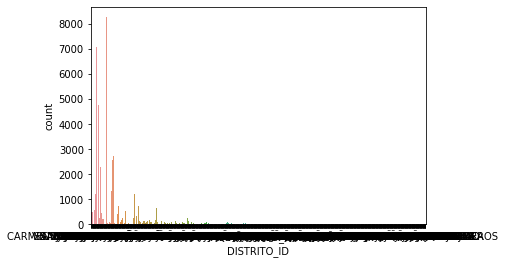

In [24]:
plot_cat('DISTRITO_ID')

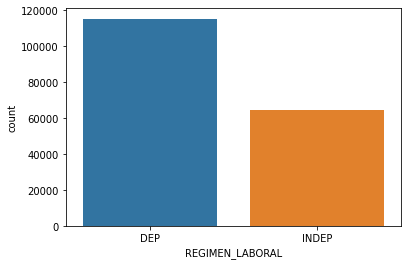

In [25]:
plot_cat('REGIMEN_LABORAL')

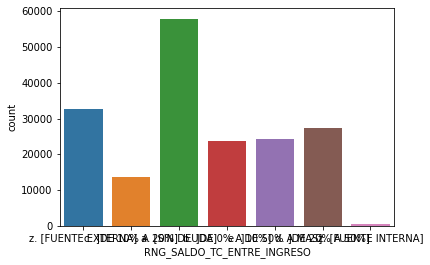

In [26]:
plot_cat('RNG_SALDO_TC_ENTRE_INGRESO')

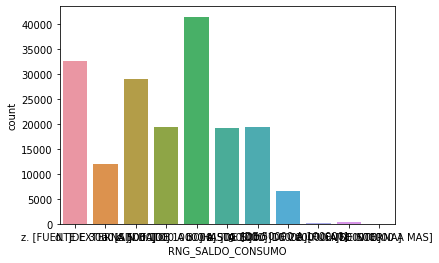

In [27]:
plot_cat('RNG_SALDO_CONSUMO')

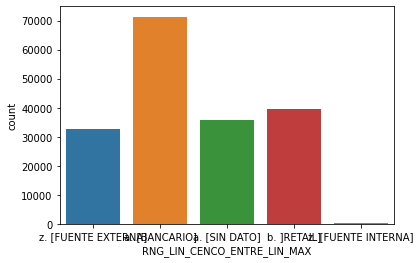

In [28]:
plot_cat('RNG_LIN_CENCO_ENTRE_LIN_MAX')

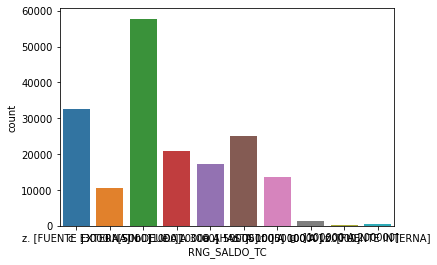

In [29]:
plot_cat('RNG_SALDO_TC')

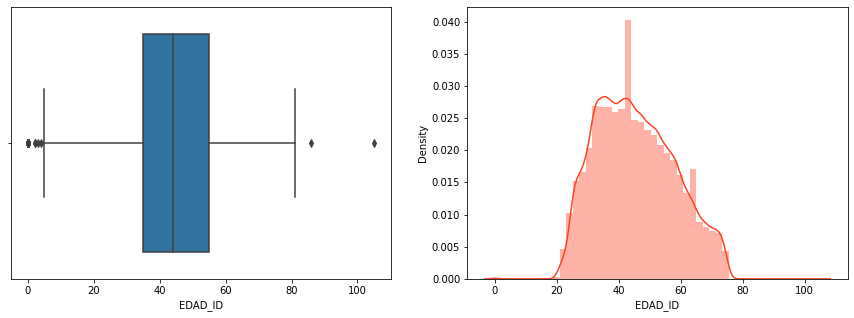

In [30]:
plot_num('EDAD_ID')

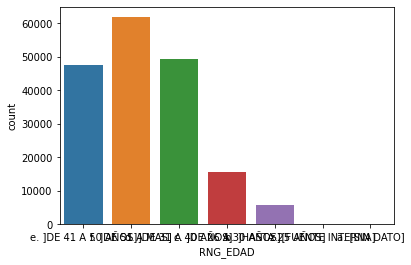

In [31]:
plot_cat('RNG_EDAD')

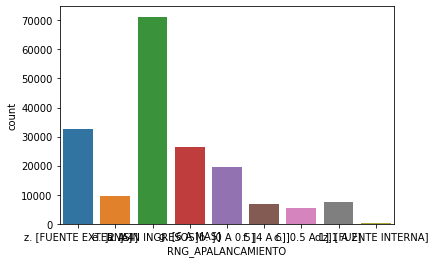

In [32]:
plot_cat('RNG_APALANCAMIENTO')

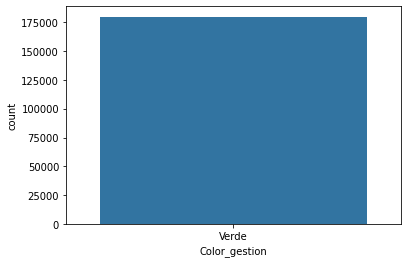

In [33]:
plot_cat('Color_gestion')

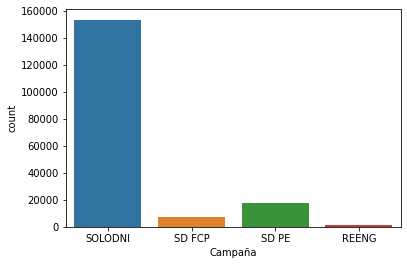

In [34]:
plot_cat('Campaña')

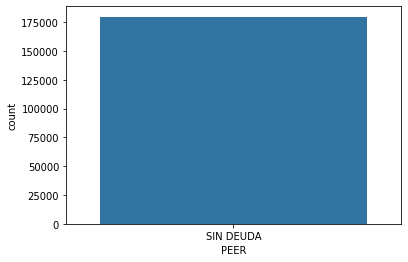

In [35]:
plot_cat('PEER')

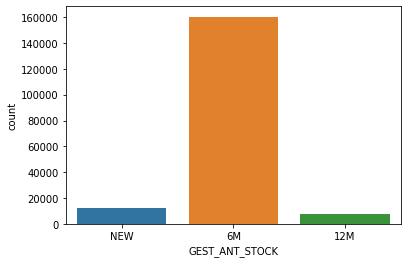

In [36]:
plot_cat('GEST_ANT_STOCK')

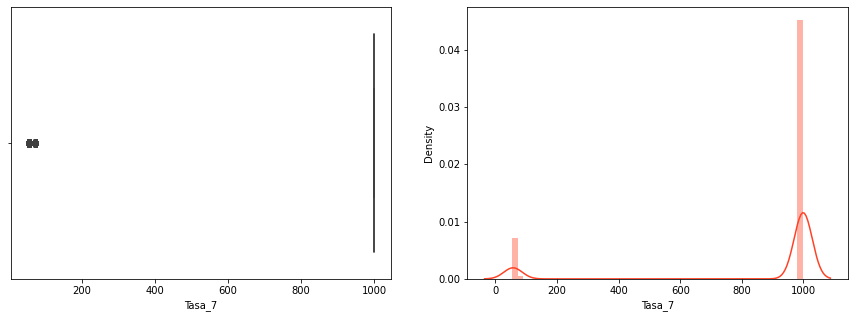

In [37]:
plot_num('Tasa_7')

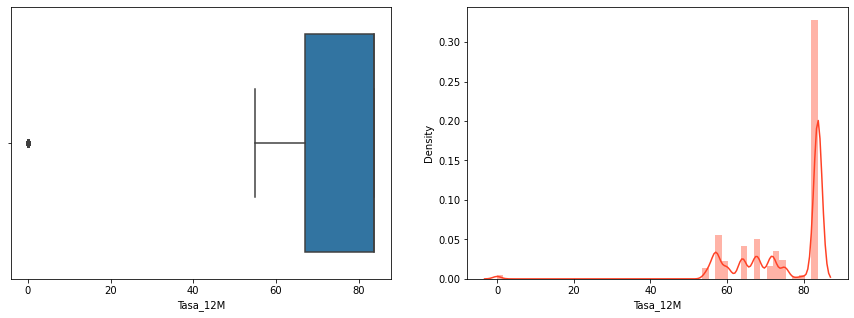

In [38]:
plot_num('Tasa_12M')

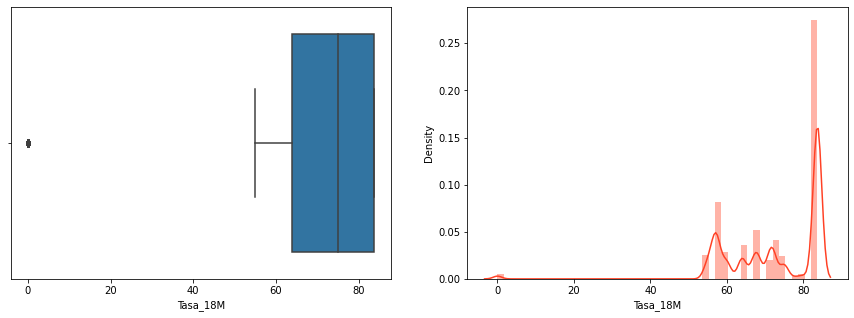

In [39]:
plot_num('Tasa_18M')

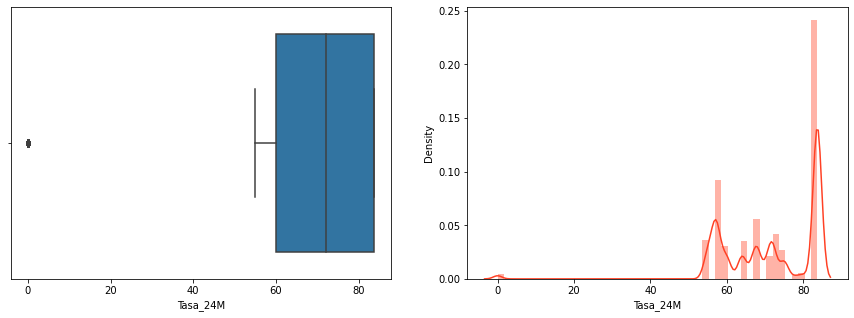

In [40]:
plot_num('Tasa_24M')

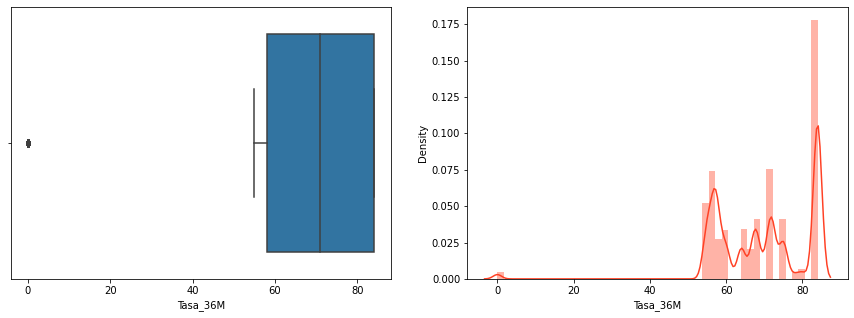

In [41]:
plot_num('Tasa_36M')

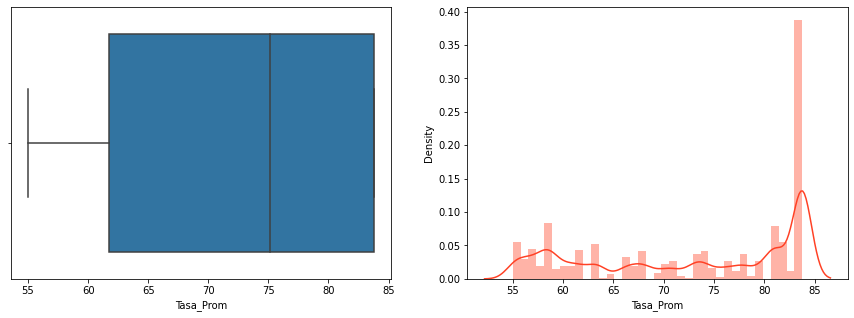

In [137]:
df['Tasa_Prom'] = (df['Tasa_36M'] + df['Tasa_24M'] + df['Tasa_18M'] + df['Tasa_12M'])/4
plot_num('Tasa_Prom')

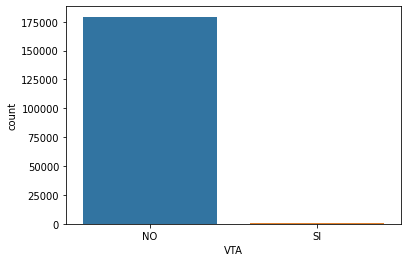

In [42]:
plot_cat('VTA')


## Replacing some coulms for median values


In [43]:
df['productoEXC'] = df['producto'].apply(lambda x: 1 if x == 'EXC' else 0)
df['productoGEN'] = df['producto'].apply(lambda x: 1 if x == 'GEN' else 0)

Reemplacing: RNG_LINEA_PLD for median of range

In [44]:
df['RNG_LINEA_PLD_num'] = df['RNG_LINEA_PLD'].replace(['a. < 2500', 'b.2500 a 5000', 'c.5001 a 7500','d.7501 a 10000', 
                                                       'e.10001 a 20000','f. > 20000'],
                                                  [1250,3750, 6250, 8750, 15000, 25000])

Replacing: ZONA (Lima = 1)

In [45]:
df['ZONA_num'] = df['ZONA'].replace(['PROV', 'LIMA'], [0,1])

Encoding variables to boolean 

I would like to note in this section i could have used the modules from sklearn that already have a encoding functions such as One Hot Encoding and Label Encoding but for learning and customization i chose to do it manually.



In [46]:
df['GRUPO_RIESGO_G1'] = df['GRUPO_RIESGO'].apply(lambda x: 1 if x == 'G1' else 0)
df['GRUPO_RIESGO_G2'] = df['GRUPO_RIESGO'].apply(lambda x: 1 if x == 'G2' else 0)
df['GRUPO_RIESGO_G3'] = df['GRUPO_RIESGO'].apply(lambda x: 1 if x == 'G3' else 0)

In [47]:
df['REGIMEN_LABORAL_DEP'] = df['REGIMEN_LABORAL'].apply(lambda x: 1 if x == 'DEP' else 0)

In [48]:
#Before encoding i'm going to replace ranges for null when they do not provide information
df['RNG_SALDO_TC_ENTRE_INGRESO'] = df['RNG_SALDO_TC_ENTRE_INGRESO'].replace(['z. [FUENTE EXTERNA]', 'z. [FUENTE INTERNA]'],
                                                  np.nan)
#df.replace('-', np.nan)

In [49]:
df['RNG_SALDO_TC_ENTRE_INGRESO_sindeuda'] = df['RNG_SALDO_TC_ENTRE_INGRESO'].apply(lambda x: 1 if x == 'a. [SIN DEUDA]' else 0)
df['RNG_SALDO_TC_ENTRE_INGRESO_a10'] = df['RNG_SALDO_TC_ENTRE_INGRESO'].apply(lambda x: 1 if x == 'b. ]DE 0% A 10%]' else 0)
df['RNG_SALDO_TC_ENTRE_INGRESO_a20'] = df['RNG_SALDO_TC_ENTRE_INGRESO'].apply(lambda x: 1 if x == 'c. ]DE 10% A 20%]' else 0)
df['RNG_SALDO_TC_ENTRE_INGRESO_a50'] = df['RNG_SALDO_TC_ENTRE_INGRESO'].apply(lambda x: 1 if x == 'd. ]DE 20% A 50%]' else 0)

In [50]:
df['RNG_INGRESO'] = df['RNG_INGRESO'].replace(['0. [NO TIENE]', 'z. [FUENTE EXTERNA]', 'z. [FUENTE INTERNA]'],
                                                  np.nan)

In [51]:
df['RNG_INGRESO_num'] = df['RNG_INGRESO']
df['RNG_INGRESO_num'] = df['RNG_INGRESO_num'].replace(['a. [HASTA 1000]', 'b. ]DE 1000 A 2000]', 'c. ]DE 2000 A 5000]',
                                                       'd. ]DE 5000 A 7000]', 'e. ]DE 7000 A 10000]', 'f. ]DE 10000 A 20000]',
                                                      'g. ]DE 20000 A 1000000]'],
                                                  [500,1500, 3500, 6000, 8500, 15000,25000])

In [52]:
#Label Encoding 
df['RNG_SALDO_CONSUMO'] = df['RNG_SALDO_CONSUMO'].replace(['z. [FUENTE EXTERNA]', 'a. [SIN DATO]', 'z. [FUENTE INTERNA]'],
                                                  np.nan)

In [53]:
df['RNG_SALDO_CONSUMO_num'] = df['RNG_SALDO_CONSUMO']
df['RNG_SALDO_CONSUMO_num'] = df['RNG_INGRESO_num'].replace(['b. ]HASTA 1000]', 'c. ]DE 1000 A 3000]', 'd. ]DE 3000 A 5000]',
                                                       'e. ]DE 5000  10000]', 'f. ]DE 10000 A 50000]', 'g. ]DE 50000 A 100000]',
                                                      'h. ]DE 200000 A 500000]', 'i. ]DE 500000 A MAS]'],
                                                  [500,1500, 3500, 7500, 30000, 75000, 350000, 50000])

In [54]:
df['RNG_LIN_CENCO_ENTRE_LIN_MAX_bancario'] = df['RNG_LIN_CENCO_ENTRE_LIN_MAX'].apply(lambda x: 1 if x == 'a. [BANCARIO]' else 0)
df['RNG_LIN_CENCO_ENTRE_LIN_MAX1_retail'] = df['RNG_LIN_CENCO_ENTRE_LIN_MAX'].apply(lambda x: 1 if x == 'b. ]RETAIL]' else 0)

In [55]:
#Label Encoding
df['RNG_SALDO_TC'] = df['RNG_SALDO_TC'].replace(['z. [FUENTE EXTERNA]', 'z. [FUENTE INTERNA]'],
                                                  np.nan)

In [56]:
df['RNG_SALDO_TC_num'] = df['RNG_SALDO_TC']
df['RNG_SALDO_TC_num'] = df['RNG_SALDO_TC_num'].replace(['0. [SIN DEUDA]', 'a. [HASTA 1000]', 'b. ]1000 A 3000]',
                                                       'c. ]3000 A 5000]', 'd. ]5000 A 10000]', 'e. ]10000 A 50000]',
                                                      'f. ]50000 A 100000]', 'g. ]100000 A 200000]'],
                                                  [0,500, 2000, 4000, 7500, 30000 , 75000, 150000])

In [57]:
df['RNG_SALDO_TC_num'].isna().sum()

33024

In [58]:
df['RNG_APALANCAMIENTO'] = df['RNG_APALANCAMIENTO'].replace(['z. [FUENTE EXTERNA]', 'z. [FUENTE INTERNA]'],
                                                  np.nan)

In [59]:
df['RNG_APALANCAMIENTO_sinIng'] = df['RNG_APALANCAMIENTO'].apply(lambda x: 1 if x == 'a. ]SIN INGRESOS]' else 0)
df['RNG_APALANCAMIENTO_a05'] = df['RNG_APALANCAMIENTO'].apply(lambda x: 1 if x == 'b. ]0 A 0.5]' else 0)
df['RNG_APALANCAMIENTO_a6mas'] = df['RNG_APALANCAMIENTO'].apply(lambda x: 1 if x == 'g. [6 A MAS]' else 0)
df['RNG_APALANCAMIENTO_a4'] = df['RNG_APALANCAMIENTO'].apply(lambda x: 1 if x == 'e. ]2 A 4]' else 0)
df['RNG_APALANCAMIENTO_a2'] = df['RNG_APALANCAMIENTO'].apply(lambda x: 1 if x == 'd. ]1 A 2]' else 0)
df['RNG_APALANCAMIENTO_a6'] = df['RNG_APALANCAMIENTO'].apply(lambda x: 1 if x == 'f. ]4 A 6]' else 0)
df['RNG_APALANCAMIENTO_a1'] = df['RNG_APALANCAMIENTO'].apply(lambda x: 1 if x == 'c. ]0.5 A 1]' else 0)

In [60]:

df['Campaña_dni'] = df['Campaña'].apply(lambda x: 1 if x == 'SOLODNI' else 0)
df['Campaña_PE'] = df['Campaña'].apply(lambda x: 1 if x == 'SD PE' else 0)
df['Campaña_FCP'] = df['Campaña'].apply(lambda x: 1 if x == 'SD FCP' else 0)

In [61]:
df['GEST_ANT_STOCK_6'] = df['GEST_ANT_STOCK'].apply(lambda x: 1 if x == '6M' else 0)
df['GEST_ANT_STOCK_12'] = df['GEST_ANT_STOCK'].apply(lambda x: 1 if x == '12M' else 0)
df['GEST_ANT_STOCK_new'] = df['GEST_ANT_STOCK'].apply(lambda x: 1 if x == 'NEW' else 0)

In [62]:
# Filling the Interest or "Tasa" variable 

df['Tasa_7'] = df['Tasa_7'].replace([999], np.nan)
df['Tasa_12M'] = df['Tasa_12M'].replace([0], np.nan)
df['Tasa_18M'] = df['Tasa_18M'].replace([0], np.nan)
df['Tasa_24M'] = df['Tasa_24M'].replace([0], np.nan)
df['Tasa_36M'] = df['Tasa_36M'].replace([0], np.nan)

Encoding the target variable "VTA"

In [63]:
df['target'] = df['VTA'].apply(lambda x: 1 if x == 'SI' else 0)

In [64]:
df.target.value_counts(normalize = True)

0    0.996997
1    0.003003
Name: target, dtype: float64

Since our target variable represents less than 0.5% of the total data i'm going to use undersampling and oversampling in this dataset.

## Spliting cuantitative and cualitative variables

In [94]:
df.columns

Index(['producto', 'CantidadGestiones', 'CantidadGestiones_Dis', 'LINEA',
       'RNG_LINEA_PLD', 'ZONA', 'SCORE_AZTECA', 'PROP_AZTECA', 'SCORE_Q_MIL',
       'GRUPO_RIESGO', 'FECHA_CARGA', 'DEPARTAMENTO_ID', 'PROVINCIA_ID',
       'DISTRITO_ID', 'REGIMEN_LABORAL', 'RNG_SALDO_TC_ENTRE_INGRESO',
       'RNG_INGRESO', 'RNG_SALDO_CONSUMO', 'RNG_LIN_CENCO_ENTRE_LIN_MAX',
       'RNG_SALDO_TC', 'EDAD_ID', 'RNG_EDAD', 'NUM_TC', 'RNG_CANTIDADTC',
       'RNG_APALANCAMIENTO', 'Color_gestion', 'Campaña', 'PEER',
       'GEST_ANT_STOCK', 'Tasa_7', 'Tasa_12M', 'Tasa_18M', 'Tasa_24M',
       'Tasa_36M', 'VTA', 'productoEXC', 'productoGEN', 'RNG_LINEA_PLD_num',
       'ZONA_num', 'GRUPO_RIESGO_G1', 'GRUPO_RIESGO_G2', 'GRUPO_RIESGO_G3',
       'REGIMEN_LABORAL_DEP', 'RNG_SALDO_TC_ENTRE_INGRESO_sindeuda',
       'RNG_SALDO_TC_ENTRE_INGRESO_a10', 'RNG_SALDO_TC_ENTRE_INGRESO_a20',
       'RNG_SALDO_TC_ENTRE_INGRESO_a50', 'RNG_INGRESO_num',
       'RNG_SALDO_CONSUMO_num', 'RNG_LIN_CENCO_ENTRE_LIN_MAX_ba

In [146]:
column_cuali = ['RNG_LINEA_PLD', 'GRUPO_RIESGO', 'FECHA_CARGA', 'DEPARTAMENTO_ID', 'PROVINCIA_ID', 'DISTRITO_ID',
      'REGIMEN_LABORAL', 
       'RNG_SALDO_CONSUMO', 'RNG_LIN_CENCO_ENTRE_LIN_MAX',
       'RNG_SALDO_TC', 'RNG_EDAD', 'RNG_CANTIDADTC',
       'RNG_APALANCAMIENTO', 'Color_gestion', 'Campaña', 'PEER',
       'GEST_ANT_STOCK']
column_cuanti = ['productoEXC','productoGEN','CantidadGestiones', 'CantidadGestiones_Dis', 'LINEA','SCORE_AZTECA', 'PROP_AZTECA',
                 'SCORE_Q_MIL', 'RNG_LINEA_PLD_num','ZONA_num','GRUPO_RIESGO_G1', 'GRUPO_RIESGO_G2','GRUPO_RIESGO_G3','REGIMEN_LABORAL_DEP', 
                 'RNG_SALDO_TC_ENTRE_INGRESO_sindeuda','RNG_SALDO_TC_ENTRE_INGRESO_a10', 'RNG_SALDO_TC_ENTRE_INGRESO_a20',
                 'RNG_SALDO_TC_ENTRE_INGRESO_a50', 'RNG_INGRESO_num', 'RNG_SALDO_CONSUMO_num', 'RNG_LIN_CENCO_ENTRE_LIN_MAX_bancario',
                 'RNG_LIN_CENCO_ENTRE_LIN_MAX1_retail', 'RNG_SALDO_TC_num','EDAD_ID', 'NUM_TC',
                 'RNG_APALANCAMIENTO_sinIng', 'RNG_APALANCAMIENTO_a05', 'RNG_APALANCAMIENTO_a6mas', 'RNG_APALANCAMIENTO_a4',
                 'RNG_APALANCAMIENTO_a2','RNG_APALANCAMIENTO_a6', 'RNG_APALANCAMIENTO_a1','Campaña_dni','Campaña_PE','Campaña_FCP',
                 'GEST_ANT_STOCK_6','GEST_ANT_STOCK_12','GEST_ANT_STOCK_new','Tasa_7', 'Tasa_12M', 'Tasa_18M', 'Tasa_24M','Tasa_36M', 'target',
                 'CantidadGestiones_cub', 'CantidadGestiones_Dis_cub', 'Tasa_Prom']

In [147]:
df[column_cuanti].shape

(179823, 47)

In [148]:
df[column_cuanti].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179823 entries, 0 to 179822
Data columns (total 47 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   productoEXC                           179823 non-null  int64  
 1   productoGEN                           179823 non-null  int64  
 2   CantidadGestiones                     179823 non-null  int64  
 3   CantidadGestiones_Dis                 179823 non-null  int64  
 4   LINEA                                 179823 non-null  int64  
 5   SCORE_AZTECA                          179823 non-null  int64  
 6   PROP_AZTECA                           179823 non-null  int64  
 7   SCORE_Q_MIL                           179823 non-null  int64  
 8   RNG_LINEA_PLD_num                     179823 non-null  int64  
 9   ZONA_num                              179823 non-null  int64  
 10  GRUPO_RIESGO_G1                       179823 non-null  int64  
 11  

In [149]:
#This is the data frame i'll use for modeling
total_df = df[column_cuanti]

In [150]:
import matplotlib.pyplot as plt
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')

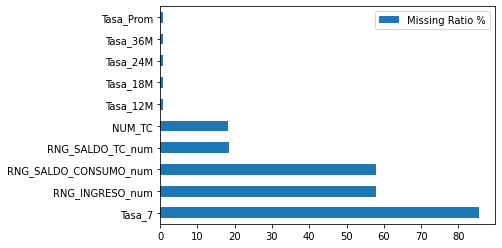

In [151]:
plot_nas(total_df)

In [152]:
temp = total_df[total_df['Tasa_36M'].isna() | total_df['Tasa_24M'].isna()  | total_df['Tasa_18M'].isna()  | total_df['Tasa_12M'].isna() ]
#1497
temp['target'].sum()
temp

,productoEXC,productoGEN,CantidadGestiones,CantidadGestiones_Dis,LINEA,SCORE_AZTECA,PROP_AZTECA,SCORE_Q_MIL,RNG_LINEA_PLD_num,ZONA_num,...,GEST_ANT_STOCK_new,Tasa_7,Tasa_12M,Tasa_18M,Tasa_24M,Tasa_36M,target,CantidadGestiones_cub,CantidadGestiones_Dis_cub,Tasa_Prom
220,0,1,0,30,8100,355,4,470255,8750,1,...,0,NaN,NaN,NaN,NaN,NaN,0,0.0,3.107233,NaN
788,0,1,0,12,30000,401,4,488394,25000,0,...,0,57.0,NaN,NaN,NaN,NaN,0,0.0,2.289428,NaN
980,0,1,0,2,7700,323,4,372370,8750,0,...,0,NaN,NaN,NaN,NaN,NaN,0,0.0,1.259921,NaN
1099,0,1,0,8,6100,181,4,393092,6250,1,...,0,NaN,NaN,NaN,NaN,NaN,0,0.0,2.000000,NaN
1354,0,1,0,4,15300,619,4,396977,15000,0,...,0,NaN,NaN,NaN,NaN,NaN,0,0.0,1.587401,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173564,0,1,0,3,5400,0,4,483734,6250,1,...,0,NaN,NaN,NaN,NaN,NaN,0,0.0,1.442250,NaN
173566,0,1,0,4,6500,0,4,438463,6250,0,...,0,NaN,NaN,NaN,NaN,NaN,0,0.0,1.587401,NaN
173749,0,1,0,2,18300,484,4,236719,15000,0,...,0,NaN,NaN,NaN,NaN,NaN,0,0.0,1.259921,NaN
173758,0,1,0,20,21400,355,4,500851,25000,0,...,0,NaN,NaN,NaN,NaN,NaN,0,0.0,2.714418,NaN


In [153]:
total_df = total_df.drop(temp.index)

Deleting variables with 60%+ of missing data

In [154]:
total_df.drop(['Tasa_7'], axis=1, inplace = True)

In [155]:
total_df.drop(['RNG_SALDO_CONSUMO_num', 'RNG_INGRESO_num'], axis=1, inplace = True)

## Filling empty values

#### Saldo TC

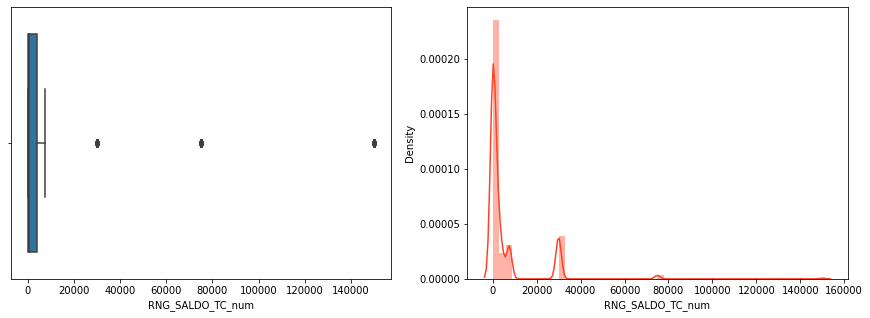

In [156]:
plot_num('RNG_SALDO_TC_num')

In [157]:
total_df['RNG_SALDO_TC_num'].describe()

count    145910.000000
mean       5931.677061
std       13359.210568
min           0.000000
25%           0.000000
50%         500.000000
75%        4000.000000
max      150000.000000
Name: RNG_SALDO_TC_num, dtype: float64

In [158]:
total_df['RNG_SALDO_TC_num'].fillna(0)

0             0.0
1          4000.0
2             0.0
3          2000.0
4         30000.0
           ...   
179818     2000.0
179819      500.0
179820        0.0
179821        0.0
179822        0.0
Name: RNG_SALDO_TC_num, Length: 178326, dtype: float64

#### Num TC

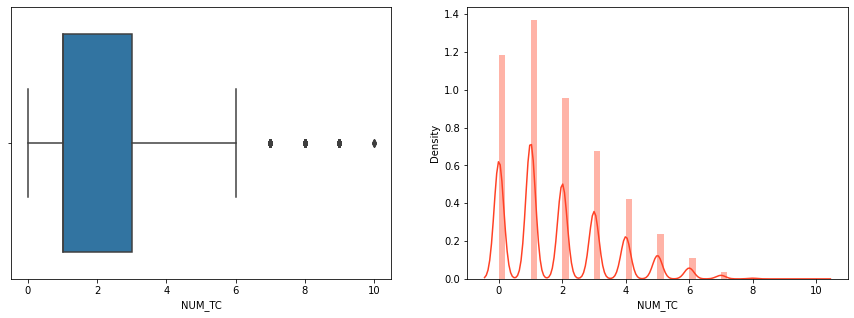

In [159]:
plot_num('NUM_TC')

In [160]:
total_df['NUM_TC'].describe()

count    145948.000000
mean          1.835715
std           1.638221
min           0.000000
25%           1.000000
50%           1.000000
75%           3.000000
max          10.000000
Name: NUM_TC, dtype: float64

In [161]:
total_df['NUM_TC']= total_df['NUM_TC'].fillna(0)

## Deeper look into the target variable

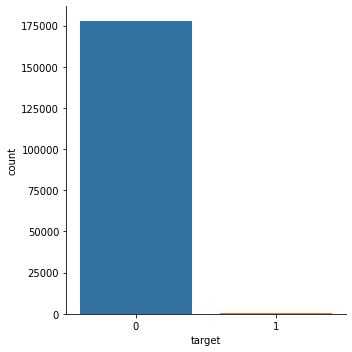

In [162]:
sns.factorplot('target',data=total_df,kind="count")

In [163]:
total_df.target.value_counts(normalize=True)

0    0.997179
1    0.002821
Name: target, dtype: float64

In [164]:
total_df.target.value_counts()

0    177823
1       503
Name: target, dtype: int64

In [165]:
total_df.target.isna().sum()

0

# Feature Selection

Por Random Forest

In [166]:
import matplotlib.pyplot as plt
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')


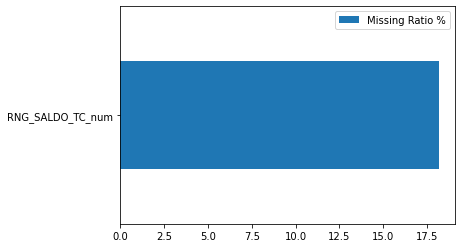

In [167]:
plot_nas(total_df)

In [168]:
total_df['RNG_SALDO_TC_num'] = total_df['RNG_SALDO_TC_num'].fillna(0)

In [169]:
forest = RandomForestClassifier(n_jobs=-1)
forest.fit(total_df.drop(['target'],axis=1), total_df.target)
importances = forest.feature_importances_

In [170]:
TablaImportancia = pd.concat([pd.DataFrame({'Driver':list(total_df.drop(['target'],axis=1).columns)}),
                              pd.DataFrame({'Importancia':list(forest.feature_importances_)})], axis = 1)
ImportanciaVariables = TablaImportancia[['Driver','Importancia']].sort_values('Importancia', ascending = False).reset_index(drop = True)
ImportanciaVariables

,Driver,Importancia
0,SCORE_Q_MIL,0.109783
1,EDAD_ID,0.102072
2,SCORE_AZTECA,0.093750
3,LINEA,0.079245
4,CantidadGestiones_Dis_cub,0.073852
5,CantidadGestiones_Dis,0.073422
6,NUM_TC,0.038357
7,Tasa_Prom,0.034632
8,RNG_SALDO_TC_num,0.030626
9,CantidadGestiones,0.028638


In [171]:
ImportanciaVariables.to_csv('importancia.csv')

Logarithmic Regression

In [172]:
import statsmodels.api as sm
logit_model=sm.Logit(total_df['target'],total_df.drop(['target'],axis=1))
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.017182
         Iterations 23
                                          Results: Logit
Model:                         Logit                       Pseudo R-squared:            0.113      
Dependent Variable:            target                      AIC:                         6208.1312  
Date:                          2023-03-05 21:46            BIC:                         6611.7860  
No. Observations:              178326                      Log-Likelihood:              -3064.1    
Df Model:                      39                          LL-Null:                     -3455.3    
Df Residuals:                  178286                      LLR p-value:                 4.2735e-139
Converged:                     1.0000                      Scale:                       1.0000     
No. Iterations:                23.0000                                                             
----------------------------------------

In [180]:
#Extracting the most useful variables
var_modelo = ['SCORE_AZTECA','LINEA','CantidadGestiones_Dis_cub',
              'CantidadGestiones','RNG_SALDO_TC_num','ZONA_num', 'REGIMEN_LABORAL_DEP',
              'RNG_SALDO_TC_ENTRE_INGRESO_sindeuda','RNG_APALANCAMIENTO_a6mas','RNG_SALDO_TC_ENTRE_INGRESO_a50',
              'RNG_APALANCAMIENTO_a05', 'PROP_AZTECA','RNG_SALDO_TC_ENTRE_INGRESO_a10', 'RNG_SALDO_TC_ENTRE_INGRESO_a20']
              #'SCORE_Q_MIL', 'EDAD_ID','NUM_TC','Tasa_Prom','Tasa_12M', 'Tasa_18M', 'Tasa_24M','Tasa_36M', ,'RNG_APALANCAMIENTO_a2'

In [181]:
# Logistic Regression
import statsmodels.api as sm
logit_model=sm.Logit(total_df['target'],total_df[var_modelo])
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.023144
         Iterations 11
                                   Results: Logit
Model:                      Logit                  Pseudo R-squared:       -0.194   
Dependent Variable:         target                 AIC:                    8282.1795
Date:                       2023-03-05 21:57       BIC:                    8423.4587
No. Observations:           178326                 Log-Likelihood:         -4127.1  
Df Model:                   13                     LL-Null:                -3455.3  
Df Residuals:               178312                 LLR p-value:            1.0000   
Converged:                  1.0000                 Scale:                  1.0000   
No. Iterations:             11.0000                                                 
------------------------------------------------------------------------------------
                                     Coef.  Std.Err.    z     P>|z|   [0.025  0.97

In [182]:
total_df.columns

Index(['productoEXC', 'productoGEN', 'CantidadGestiones',
       'CantidadGestiones_Dis', 'LINEA', 'SCORE_AZTECA', 'PROP_AZTECA',
       'SCORE_Q_MIL', 'RNG_LINEA_PLD_num', 'ZONA_num', 'GRUPO_RIESGO_G1',
       'GRUPO_RIESGO_G2', 'GRUPO_RIESGO_G3', 'REGIMEN_LABORAL_DEP',
       'RNG_SALDO_TC_ENTRE_INGRESO_sindeuda', 'RNG_SALDO_TC_ENTRE_INGRESO_a10',
       'RNG_SALDO_TC_ENTRE_INGRESO_a20', 'RNG_SALDO_TC_ENTRE_INGRESO_a50',
       'RNG_LIN_CENCO_ENTRE_LIN_MAX_bancario',
       'RNG_LIN_CENCO_ENTRE_LIN_MAX1_retail', 'RNG_SALDO_TC_num', 'EDAD_ID',
       'NUM_TC', 'RNG_APALANCAMIENTO_sinIng', 'RNG_APALANCAMIENTO_a05',
       'RNG_APALANCAMIENTO_a6mas', 'RNG_APALANCAMIENTO_a4',
       'RNG_APALANCAMIENTO_a2', 'RNG_APALANCAMIENTO_a6',
       'RNG_APALANCAMIENTO_a1', 'Campaña_dni', 'Campaña_PE', 'Campaña_FCP',
       'GEST_ANT_STOCK_6', 'GEST_ANT_STOCK_12', 'GEST_ANT_STOCK_new',
       'Tasa_12M', 'Tasa_18M', 'Tasa_24M', 'Tasa_36M', 'target',
       'CantidadGestiones_cub', 'CantidadGestione

<AxesSubplot:>

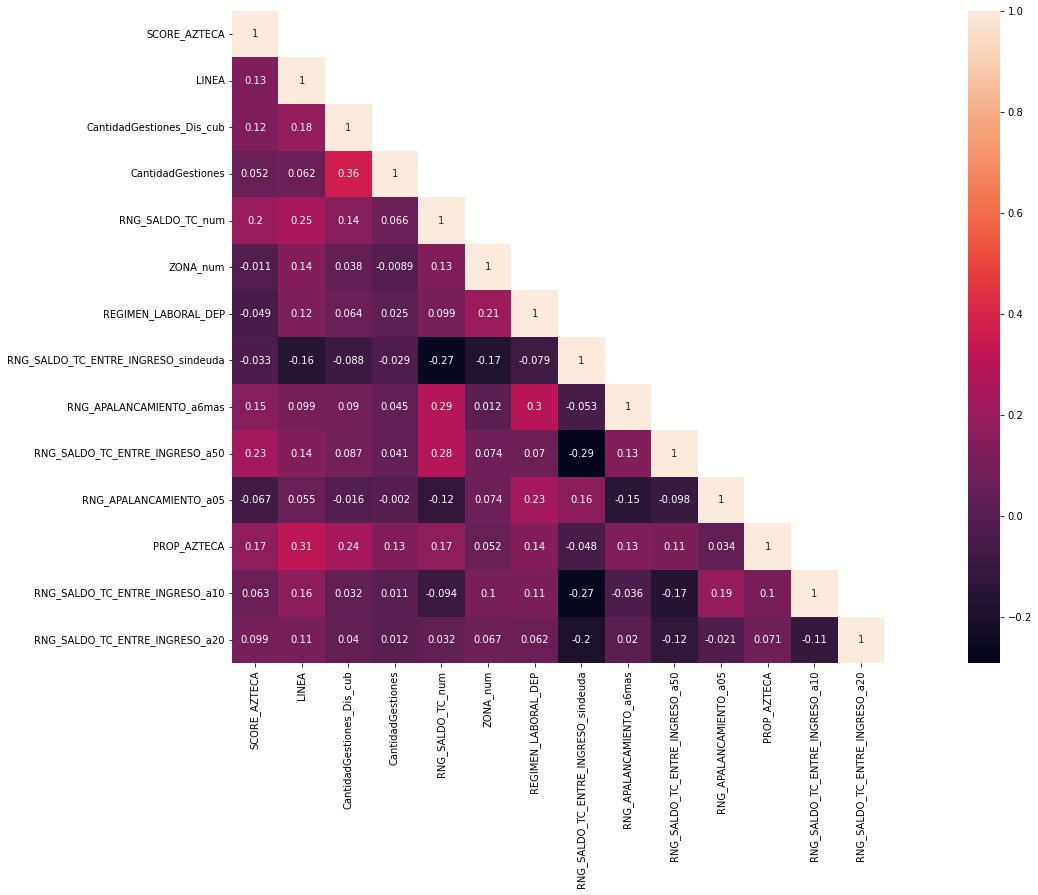

In [183]:
## Correlation Matrix
cor_mat = total_df[var_modelo].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [185]:
total_df['target'].value_counts(normalize = True)

0    0.997179
1    0.002821
Name: target, dtype: float64

# Before Modeling: Spliting train, test and an unseen portion of the dataset

*   df: dataframe for models
*   df_unseen: 10% of dataset
*   total_df: df + df_unseen

We started with 180k records and we are using 178,326 or 99.16% for modeling


In [189]:
total_df_MODELO = total_df[var_modelo + ['target']]
print('Data for Modeling: ' + str(total_df_MODELO.shape))

Data for Modeling: (178326, 15)


In [190]:
df = total_df_MODELO.sample(frac=0.9, random_state=1000)
df_unseen = total_df_MODELO.drop(df.index)
df.reset_index(inplace=True, drop=True)
df_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(df.shape))
print('Unseen Data For Predictions: ' + str(df_unseen.shape))

Data for Modeling: (160493, 15)
Unseen Data For Predictions: (17833, 15)


In [191]:
df.target.value_counts()

0    160046
1       447
Name: target, dtype: int64

# First try i'll be  modeling with the full dataset

In [194]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [195]:

X = df.drop('target', axis=1)
y = df['target']

In [196]:
#Train and Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

In [197]:
X_train.shape, y_train.shape

((112345, 14), (112345,))

In [198]:
X_test.shape, y_test.shape

((48148, 14), (48148,))

## Decision Tree

In [199]:
tree = DecisionTreeClassifier()
tree_model = tree.fit(X_train, y_train)
Y_pred = tree_model.predict(X_test)

In [200]:
ind = pd.DataFrame(columns = ['Modelo', 'MuestraTam', 'Muestra', 'Tamaño', 'Accuracy', 'Precision', 'Recall', 'F1Score'])

In [201]:
print("Matriz confusion: Test")
print(confusion_matrix(y_test,Y_pred))

ind = ind.append({'Modelo' : 'DecisionTree', 'MuestraTam': 'Completa', 'Muestra' : 'Test', 'Tamaño': len(Y_pred), 'Accuracy' : accuracy_score(y_test,Y_pred), 
                  'Precision' : precision_score(y_test,Y_pred), 'Recall' : recall_score(y_test,Y_pred), 'F1Score' : f1_score(y_test,Y_pred)}, ignore_index = True)

Matriz confusion: Test
[[47834   181]
 [  127     6]]


In [202]:
# Saving results to compare later
y_real = df_unseen['target']
Y_pred = tree_model.predict(df_unseen.drop(['target'], axis=1))
U_pred = tree_model.predict_proba(df_unseen.drop(['target'], axis=1))[:,1]
datos = np.hstack((df_unseen['target'].values.reshape(-1,1), U_pred.reshape(-1,1)))
df_submmit = pd.DataFrame(datos, columns=['real','prob'])
df_submmit.to_csv('com_tree.csv', index=False)

print("Matriz confusion: Unseen")
print(confusion_matrix(y_real,Y_pred))

ind = ind.append({'Modelo' : 'DecisionTree', 'MuestraTam': 'Completa', 'Muestra' : 'Reserva', 'Tamaño': len(Y_pred), 'Accuracy' : accuracy_score(y_real,Y_pred), 
                  'Precision' : precision_score(y_real,Y_pred), 'Recall' : recall_score(y_real,Y_pred), 'F1Score' : f1_score(y_real,Y_pred)}, ignore_index = True)
ind.head()

Matriz confusion: Unseen
[[17702    75]
 [   56     0]]


,Modelo,MuestraTam,Muestra,Tamaño,Accuracy,Precision,Recall,F1Score
0,DecisionTree,Completa,Test,48148,0.993603,0.032086,0.045113,0.0375
1,DecisionTree,Completa,Reserva,17833,0.992654,0.000000,0.000000,0.0000


## XGBoost

In [203]:
xgb_mod=xgb.XGBClassifier()
xgb_mod.fit(X_train, y_train)
Y_pred= xgb_mod.predict(X_test)

In [204]:
print("Matriz confusion: Test")
print(confusion_matrix(y_test,Y_pred))

ind = ind.append({'Modelo' : 'XGBoost', 'MuestraTam': 'Completa', 'Muestra' : 'Test', 'Tamaño': len(Y_pred), 'Accuracy' : accuracy_score(y_test,Y_pred), 
                  'Precision' : precision_score(y_test,Y_pred), 'Recall' : recall_score(y_test,Y_pred), 'F1Score' : f1_score(y_test,Y_pred)}, ignore_index = True)

Matriz confusion: Test
[[48013     2]
 [  133     0]]


In [205]:
# Saving results to compare later
y_real = df_unseen['target']
Y_pred = xgb_mod.predict(df_unseen.drop(['target'], axis=1))
U_pred = xgb_mod.predict_proba(df_unseen.drop(['target'], axis=1))[:,1]
datos = np.hstack((df_unseen['target'].values.reshape(-1,1), U_pred.reshape(-1,1)))
df_submmit = pd.DataFrame(datos, columns=['real','prob'])
df_submmit.to_csv('com_xgb.csv', index=False)

print("Matriz confusion: Unseen")
print(confusion_matrix(y_real,Y_pred))

ind = ind.append({'Modelo' : 'XGBoost','MuestraTam': 'Completa', 'Muestra' : 'Reserva', 'Tamaño': len(Y_pred), 'Accuracy' : accuracy_score(y_real,Y_pred), 
                  'Precision' : precision_score(y_real,Y_pred), 'Recall' : recall_score(y_real,Y_pred), 'F1Score' : f1_score(y_real,Y_pred)}, ignore_index = True)
ind.head()

Matriz confusion: Unseen
[[17777     0]
 [   56     0]]


,Modelo,MuestraTam,Muestra,Tamaño,Accuracy,Precision,Recall,F1Score
0,DecisionTree,Completa,Test,48148,0.993603,0.032086,0.045113,0.0375
1,DecisionTree,Completa,Reserva,17833,0.992654,0.000000,0.000000,0.0000
2,XGBoost,Completa,Test,48148,0.997196,0.000000,0.000000,0.0000
3,XGBoost,Completa,Reserva,17833,0.996860,0.000000,0.000000,0.0000


## RandomForest

In [206]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
Y_pred=rf.predict(X_test)

In [207]:
print("Matriz confusion: Test")
print(confusion_matrix(y_test,Y_pred))

ind = ind.append({'Modelo' : 'RandomForest','MuestraTam': 'Completa', 'Muestra' : 'Test', 'Tamaño': len(Y_pred), 'Accuracy' : accuracy_score(y_test,Y_pred), 
                  'Precision' : precision_score(y_test,Y_pred), 'Recall' : recall_score(y_test,Y_pred), 'F1Score' : f1_score(y_test,Y_pred)}, ignore_index = True)

Matriz confusion: Test
[[48011     4]
 [  133     0]]


In [208]:
# Saving results to compare later
y_real = df_unseen['target']
Y_pred = rf.predict(df_unseen.drop(['target'], axis=1))
U_pred = rf.predict_proba(df_unseen.drop(['target'], axis=1))[:,1]
datos = np.hstack(( df_unseen['target'].values.reshape(-1,1), U_pred.reshape(-1,1)))
df_submmit = pd.DataFrame(datos, columns=['real','prob'])
df_submmit.to_csv('com_rf.csv', index=False)

print("Matriz confusion: Unseen")
print(confusion_matrix(y_real,Y_pred))

ind = ind.append({'Modelo' : 'RandomForest','MuestraTam': 'Completa', 'Muestra' : 'Reserva', 'Tamaño': len(Y_pred), 'Accuracy' : accuracy_score(y_real,Y_pred), 
                  'Precision' : precision_score(y_real,Y_pred), 'Recall' : recall_score(y_real,Y_pred), 'F1Score' : f1_score(y_real,Y_pred)}, ignore_index = True)
ind

Matriz confusion: Unseen
[[17777     0]
 [   56     0]]


,Modelo,MuestraTam,Muestra,Tamaño,Accuracy,Precision,Recall,F1Score
0,DecisionTree,Completa,Test,48148,0.993603,0.032086,0.045113,0.0375
1,DecisionTree,Completa,Reserva,17833,0.992654,0.000000,0.000000,0.0000
2,XGBoost,Completa,Test,48148,0.997196,0.000000,0.000000,0.0000
3,XGBoost,Completa,Reserva,17833,0.996860,0.000000,0.000000,0.0000
4,RandomForest,Completa,Test,48148,0.997155,0.000000,0.000000,0.0000
5,RandomForest,Completa,Reserva,17833,0.996860,0.000000,0.000000,0.0000


# Resampling

In [209]:
# Class Count for target variable
count_class_0, count_class_1 = df.target.value_counts()

In [210]:
print('Cantidades por fila de clase:')
print('Class_0:',count_class_0)
print('Class_1:',count_class_1)

Cantidades por fila de clase:
Class_0: 160046
Class_1: 447


In [211]:
df_class_0 = df[df['target'] == 0]
df_class_1 = df[df['target'] == 1]

In [212]:
print('Dimensión por tipo de clases:')
print('dim class_0:',df_class_0.shape)
print('dim class_1:',df_class_1.shape)

Dimensión por tipo de clases:
dim class_0: (160046, 15)
dim class_1: (447, 15)


## Models with Under-sampling 


In [213]:
df_class_0_under = df_class_0.sample(count_class_1*4)
df_under = pd.concat([df_class_0_under, df_class_1], axis=0)

In [214]:
print('Dimensión por tipo de clases generadas:')
print('dim df_class_0_under:',df_class_0_under.shape)
print('dim df_under:',df_under.shape)

Dimensión por tipo de clases generadas:
dim df_class_0_under: (1788, 15)
dim df_under: (2235, 15)


In [215]:
print('Random under-sampling:')
print(df_under.target.value_counts())

Random under-sampling:
0    1788
1     447
Name: target, dtype: int64


<AxesSubplot:title={'center':'Count (target)'}>

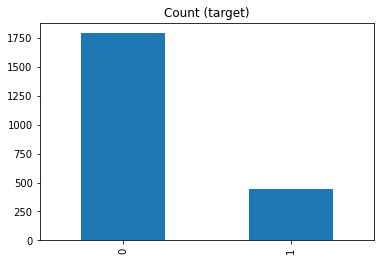

In [216]:
df_under.target.value_counts().plot(kind='bar', title='Count (target)')

In [217]:

X = df_under.drop('target', axis=1)
y = df_under['target']

In [218]:
#Train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

### Decision Tree

In [219]:
tree = DecisionTreeClassifier()
tree_model = tree.fit(X_train, y_train)
Y_pred = tree_model.predict(X_test)

In [220]:
print("Matriz confusion: Test")
print(confusion_matrix(y_test,Y_pred))

ind = ind.append({'Modelo' : 'DecisionTree Under', 'MuestraTam': 'Under', 'Muestra' : 'Test', 'Tamaño': len(Y_pred), 'Accuracy' : accuracy_score(y_test,Y_pred), 
                  'Precision' : precision_score(y_test,Y_pred), 'Recall' : recall_score(y_test,Y_pred), 'F1Score' : f1_score(y_test,Y_pred)}, ignore_index = True)

Matriz confusion: Test
[[408 120]
 [ 77  66]]


In [221]:
# Saving results to compare later
y_real = df_unseen['target']
Y_pred = tree_model.predict(df_unseen.drop(['target'], axis=1))
U_pred = tree_model.predict_proba(df_unseen.drop(['target'], axis=1))[:,1]
datos = np.hstack(( df_unseen['target'].values.reshape(-1,1), U_pred.reshape(-1,1)))
df_submmit = pd.DataFrame(datos, columns=['real','prob'])
df_submmit.to_csv('under_tree.csv', index=False)

print("Matriz confusion: Unseen")
print(confusion_matrix(y_real,Y_pred))

ind = ind.append({'Modelo' : 'DecisionTree Under', 'MuestraTam': 'Under', 'Muestra' : 'Reserva', 'Tamaño': len(Y_pred), 'Accuracy' : accuracy_score(y_real,Y_pred), 
                  'Precision' : precision_score(y_real,Y_pred), 'Recall' : recall_score(y_real,Y_pred), 'F1Score' : f1_score(y_real,Y_pred)}, ignore_index = True)
ind

Matriz confusion: Unseen
[[14418  3359]
 [   36    20]]


,Modelo,MuestraTam,Muestra,Tamaño,Accuracy,Precision,Recall,F1Score
0,DecisionTree,Completa,Test,48148,0.993603,0.032086,0.045113,0.037500
1,DecisionTree,Completa,Reserva,17833,0.992654,0.000000,0.000000,0.000000
2,XGBoost,Completa,Test,48148,0.997196,0.000000,0.000000,0.000000
3,XGBoost,Completa,Reserva,17833,0.996860,0.000000,0.000000,0.000000
4,RandomForest,Completa,Test,48148,0.997155,0.000000,0.000000,0.000000
5,RandomForest,Completa,Reserva,17833,0.996860,0.000000,0.000000,0.000000
6,DecisionTree Under,Under,Test,671,0.706408,0.354839,0.461538,0.401216
7,DecisionTree Under,Under,Reserva,17833,0.809623,0.005919,0.357143,0.011645


### XGBoost

In [222]:
xgb_mod=xgb.XGBClassifier()
xgb_mod.fit(X_train, y_train)
Y_pred= xgb_mod.predict(X_test)

In [223]:
print("Matriz confusion: Test")
print(confusion_matrix(y_test,Y_pred))

ind = ind.append({'Modelo' : 'XGBoost Under','MuestraTam': 'Under', 'Muestra' : 'Test', 'Tamaño': len(Y_pred), 'Accuracy' : accuracy_score(y_test,Y_pred), 
                  'Precision' : precision_score(y_test,Y_pred), 'Recall' : recall_score(y_test,Y_pred), 'F1Score' : f1_score(y_test,Y_pred)}, ignore_index = True)

Matriz confusion: Test
[[483  45]
 [ 99  44]]


In [224]:
# Saving results to compare later
y_real = df_unseen['target']
Y_pred = xgb_mod.predict(df_unseen.drop(['target'], axis=1))
U_pred = xgb_mod.predict_proba(df_unseen.drop(['target'], axis=1))[:,1]
datos = np.hstack(( df_unseen['target'].values.reshape(-1,1), U_pred.reshape(-1,1)))
df_submmit = pd.DataFrame(datos, columns=['real','prob'])
df_submmit.to_csv('under_xgb.csv', index=False)

print("Matriz confusion: Unseen")
print(confusion_matrix(y_real,Y_pred))

ind = ind.append({'Modelo' : 'XGBoost Under', 'MuestraTam': 'Under','Muestra' : 'Reserva', 'Tamaño': len(Y_pred), 'Accuracy' : accuracy_score(y_real,Y_pred), 
                  'Precision' : precision_score(y_real,Y_pred), 'Recall' : recall_score(y_real,Y_pred), 'F1Score' : f1_score(y_real,Y_pred)}, ignore_index = True)
ind

Matriz confusion: Unseen
[[16276  1501]
 [   42    14]]


,Modelo,MuestraTam,Muestra,Tamaño,Accuracy,Precision,Recall,F1Score
0,DecisionTree,Completa,Test,48148,0.993603,0.032086,0.045113,0.037500
1,DecisionTree,Completa,Reserva,17833,0.992654,0.000000,0.000000,0.000000
2,XGBoost,Completa,Test,48148,0.997196,0.000000,0.000000,0.000000
3,XGBoost,Completa,Reserva,17833,0.996860,0.000000,0.000000,0.000000
4,RandomForest,Completa,Test,48148,0.997155,0.000000,0.000000,0.000000
5,RandomForest,Completa,Reserva,17833,0.996860,0.000000,0.000000,0.000000
6,DecisionTree Under,Under,Test,671,0.706408,0.354839,0.461538,0.401216
7,DecisionTree Under,Under,Reserva,17833,0.809623,0.005919,0.357143,0.011645
8,XGBoost Under,Under,Test,671,0.785395,0.494382,0.307692,0.379310
9,XGBoost Under,Under,Reserva,17833,0.913475,0.009241,0.250000,0.017823


### RandomForest

In [225]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
Y_pred=rf.predict(X_test)

In [226]:
print("Matriz confusion: Test")
print(confusion_matrix(y_test,Y_pred))

ind = ind.append({'Modelo' : 'RandomForest Under','MuestraTam': 'Under', 'Muestra' : 'Test', 'Tamaño': len(Y_pred), 'Accuracy' : accuracy_score(y_test,Y_pred), 
                  'Precision' : precision_score(y_test,Y_pred), 'Recall' : recall_score(y_test,Y_pred), 'F1Score' : f1_score(y_test,Y_pred)}, ignore_index = True)

Matriz confusion: Test
[[516  12]
 [108  35]]


In [227]:
# Saving results to compare latery_real = df_unseen['target']
Y_pred = rf.predict(df_unseen.drop(['target'], axis=1))
U_pred = rf.predict_proba(df_unseen.drop(['target'], axis=1))[:,1]
datos = np.hstack((df_unseen['target'].values.reshape(-1,1), U_pred.reshape(-1,1)))
df_submmit = pd.DataFrame(datos, columns=['real','prob'])
df_submmit.to_csv('under_rf.csv', index=False)

print("Matriz confusion: Unseen")
print(confusion_matrix(y_real,Y_pred))

ind = ind.append({'Modelo' : 'RandomForest Under', 'MuestraTam': 'Under','Muestra' : 'Reserva', 'Tamaño': len(Y_pred), 'Accuracy' : accuracy_score(y_real,Y_pred), 
                  'Precision' : precision_score(y_real,Y_pred), 'Recall' : recall_score(y_real,Y_pred), 'F1Score' : f1_score(y_real,Y_pred)}, ignore_index = True)
ind

Matriz confusion: Unseen
[[17140   637]
 [   51     5]]


,Modelo,MuestraTam,Muestra,Tamaño,Accuracy,Precision,Recall,F1Score
0,DecisionTree,Completa,Test,48148,0.993603,0.032086,0.045113,0.037500
1,DecisionTree,Completa,Reserva,17833,0.992654,0.000000,0.000000,0.000000
2,XGBoost,Completa,Test,48148,0.997196,0.000000,0.000000,0.000000
3,XGBoost,Completa,Reserva,17833,0.996860,0.000000,0.000000,0.000000
4,RandomForest,Completa,Test,48148,0.997155,0.000000,0.000000,0.000000
5,RandomForest,Completa,Reserva,17833,0.996860,0.000000,0.000000,0.000000
6,DecisionTree Under,Under,Test,671,0.706408,0.354839,0.461538,0.401216
7,DecisionTree Under,Under,Reserva,17833,0.809623,0.005919,0.357143,0.011645
8,XGBoost Under,Under,Test,671,0.785395,0.494382,0.307692,0.379310
9,XGBoost Under,Under,Reserva,17833,0.913475,0.009241,0.250000,0.017823


## Models with Oversampling

In [228]:
df_class_1_over = df_class_1.sample(round(count_class_0/4), replace=True)
df_over = pd.concat([df_class_0, df_class_1_over], axis=0)

In [229]:
print('Dimensión por tipo de clases generadas:')
print('dim df_class_1_over:',df_class_1_over.shape)
print('dim df_over:',df_over.shape)

Dimensión por tipo de clases generadas:
dim df_class_1_over: (40012, 15)
dim df_over: (200058, 15)


In [230]:
print('Random over-sampling:')
print(df_over.target.value_counts())

Random over-sampling:
0    160046
1     40012
Name: target, dtype: int64


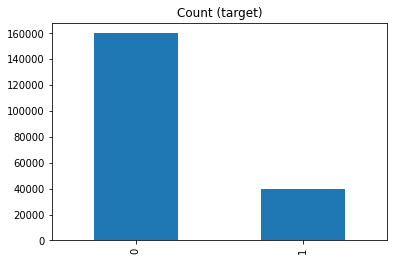

In [231]:
df_over.target.value_counts().plot(kind='bar', title='Count (target)');

In [232]:

X = df_over.drop('target', axis=1)
y = df_over['target']

In [233]:
#Train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

### Decision Tree

In [234]:
tree = DecisionTreeClassifier()
tree_model = tree.fit(X_train, y_train)
Y_pred = tree_model.predict(X_test)

In [235]:
print("Matriz confusion: Test")
print(confusion_matrix(y_test,Y_pred))

ind = ind.append({'Modelo' : 'DecisionTree Over', 'MuestraTam': 'Over', 'Muestra' : 'Test', 'Tamaño': len(Y_pred), 'Accuracy' : accuracy_score(y_test,Y_pred), 
                  'Precision' : precision_score(y_test,Y_pred), 'Recall' : recall_score(y_test,Y_pred), 'F1Score' : f1_score(y_test,Y_pred)}, ignore_index = True)

Matriz confusion: Test
[[47720   244]
 [    0 12054]]


In [236]:
# Saving results to compare later
y_real = df_unseen['target']
Y_pred = tree_model.predict(df_unseen.drop(['target'], axis=1))
U_pred = tree_model.predict_proba(df_unseen.drop(['target'], axis=1))[:,1]
datos = np.hstack(( df_unseen['target'].values.reshape(-1,1), U_pred.reshape(-1,1)))
df_submmit = pd.DataFrame(datos, columns=['real','prob'])
df_submmit.to_csv('over_tree.csv', index=False)

print("Matriz confusion: Unseen")
print(confusion_matrix(y_real,Y_pred))

ind = ind.append({'Modelo' : 'DecisionTree Over', 'MuestraTam': 'Over','Muestra' : 'Reserva', 'Tamaño': len(Y_pred), 'Accuracy' : accuracy_score(y_real,Y_pred), 
                  'Precision' : precision_score(y_real,Y_pred), 'Recall' : recall_score(y_real,Y_pred), 'F1Score' : f1_score(y_real,Y_pred)}, ignore_index = True)
ind

Matriz confusion: Unseen
[[17697    80]
 [   55     1]]


,Modelo,MuestraTam,Muestra,Tamaño,Accuracy,Precision,Recall,F1Score
0,DecisionTree,Completa,Test,48148,0.993603,0.032086,0.045113,0.037500
1,DecisionTree,Completa,Reserva,17833,0.992654,0.000000,0.000000,0.000000
2,XGBoost,Completa,Test,48148,0.997196,0.000000,0.000000,0.000000
3,XGBoost,Completa,Reserva,17833,0.996860,0.000000,0.000000,0.000000
4,RandomForest,Completa,Test,48148,0.997155,0.000000,0.000000,0.000000
5,RandomForest,Completa,Reserva,17833,0.996860,0.000000,0.000000,0.000000
6,DecisionTree Under,Under,Test,671,0.706408,0.354839,0.461538,0.401216
7,DecisionTree Under,Under,Reserva,17833,0.809623,0.005919,0.357143,0.011645
8,XGBoost Under,Under,Test,671,0.785395,0.494382,0.307692,0.379310
9,XGBoost Under,Under,Reserva,17833,0.913475,0.009241,0.250000,0.017823


### XGBoost

In [237]:
xgb_mod=xgb.XGBClassifier()
xgb_mod.fit(X_train, y_train)
Y_pred= xgb_mod.predict(X_test)

In [238]:
print("Matriz confusion: Test")
print(confusion_matrix(y_test,Y_pred))

ind = ind.append({'Modelo' : 'XGBoost Over', 'MuestraTam': 'Over', 'Muestra' : 'Test', 'Tamaño': len(Y_pred), 'Accuracy' : accuracy_score(y_test,Y_pred), 
                  'Precision' : precision_score(y_test,Y_pred), 'Recall' : recall_score(y_test,Y_pred), 'F1Score' : f1_score(y_test,Y_pred)}, ignore_index = True)

Matriz confusion: Test
[[47393   571]
 [  966 11088]]


In [239]:
# Saving results to compare later
y_real = df_unseen['target']
Y_pred = xgb_mod.predict(df_unseen.drop(['target'], axis=1))
U_pred = xgb_mod.predict_proba(df_unseen.drop(['target'], axis=1))[:,1]
datos = np.hstack((df_unseen['target'].values.reshape(-1,1), U_pred.reshape(-1,1)))
df_submmit = pd.DataFrame(datos, columns=['real','prob'])
df_submmit.to_csv('over_xgb.csv', index=False)

print("Matriz confusion: Unseen")
print(confusion_matrix(y_real,Y_pred))

ind = ind.append({'Modelo' : 'XGBoost Over','MuestraTam': 'Over',  'Muestra' : 'Reserva', 'Tamaño': len(Y_pred), 'Accuracy' : accuracy_score(y_real,Y_pred), 
                  'Precision' : precision_score(y_real,Y_pred), 'Recall' : recall_score(y_real,Y_pred), 'F1Score' : f1_score(y_real,Y_pred)}, ignore_index = True)
ind

Matriz confusion: Unseen
[[17586   191]
 [   52     4]]


,Modelo,MuestraTam,Muestra,Tamaño,Accuracy,Precision,Recall,F1Score
0,DecisionTree,Completa,Test,48148,0.993603,0.032086,0.045113,0.037500
1,DecisionTree,Completa,Reserva,17833,0.992654,0.000000,0.000000,0.000000
2,XGBoost,Completa,Test,48148,0.997196,0.000000,0.000000,0.000000
3,XGBoost,Completa,Reserva,17833,0.996860,0.000000,0.000000,0.000000
4,RandomForest,Completa,Test,48148,0.997155,0.000000,0.000000,0.000000
5,RandomForest,Completa,Reserva,17833,0.996860,0.000000,0.000000,0.000000
6,DecisionTree Under,Under,Test,671,0.706408,0.354839,0.461538,0.401216
7,DecisionTree Under,Under,Reserva,17833,0.809623,0.005919,0.357143,0.011645
8,XGBoost Under,Under,Test,671,0.785395,0.494382,0.307692,0.379310
9,XGBoost Under,Under,Reserva,17833,0.913475,0.009241,0.250000,0.017823


### RandomForest

In [240]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
Y_pred=rf.predict(X_test)

In [241]:
print("Matriz confusion: Test")
print(confusion_matrix(y_test,Y_pred))

ind = ind.append({'Modelo' : 'RandomForest Over', 'MuestraTam': 'Over', 'Muestra' : 'Test', 'Tamaño': len(Y_pred), 'Accuracy' : accuracy_score(y_test,Y_pred), 
                  'Precision' : precision_score(y_test,Y_pred), 'Recall' : recall_score(y_test,Y_pred), 'F1Score' : f1_score(y_test,Y_pred)}, ignore_index = True)

Matriz confusion: Test
[[47909    55]
 [    0 12054]]


In [242]:
# Saving results to compare later
y_real = df_unseen['target']
Y_pred = rf.predict(df_unseen.drop(['target'], axis=1))
U_pred = rf.predict_proba(df_unseen.drop(['target'], axis=1))[:,1]
datos = np.hstack((df_unseen['target'].values.reshape(-1,1), U_pred.reshape(-1,1)))
df_submmit = pd.DataFrame(datos, columns=['real','prob'])
df_submmit.to_csv('over_rf.csv', index=False)

print("Matriz confusion: Unseen")
print(confusion_matrix(y_real,Y_pred))

ind = ind.append({'Modelo' : 'RandomForest Over','MuestraTam': 'Over', 'Muestra' : 'Reserva', 'Tamaño': len(Y_pred), 'Accuracy' : accuracy_score(y_real,Y_pred), 
                  'Precision' : precision_score(y_real,Y_pred), 'Recall' : recall_score(y_real,Y_pred), 'F1Score' : f1_score(y_real,Y_pred)}, ignore_index = True)
ind

Matriz confusion: Unseen
[[17755    22]
 [   56     0]]


,Modelo,MuestraTam,Muestra,Tamaño,Accuracy,Precision,Recall,F1Score
0,DecisionTree,Completa,Test,48148,0.993603,0.032086,0.045113,0.037500
1,DecisionTree,Completa,Reserva,17833,0.992654,0.000000,0.000000,0.000000
2,XGBoost,Completa,Test,48148,0.997196,0.000000,0.000000,0.000000
3,XGBoost,Completa,Reserva,17833,0.996860,0.000000,0.000000,0.000000
4,RandomForest,Completa,Test,48148,0.997155,0.000000,0.000000,0.000000
5,RandomForest,Completa,Reserva,17833,0.996860,0.000000,0.000000,0.000000
6,DecisionTree Under,Under,Test,671,0.706408,0.354839,0.461538,0.401216
7,DecisionTree Under,Under,Reserva,17833,0.809623,0.005919,0.357143,0.011645
8,XGBoost Under,Under,Test,671,0.785395,0.494382,0.307692,0.379310
9,XGBoost Under,Under,Reserva,17833,0.913475,0.009241,0.250000,0.017823


Result:

XGBoost model combined with Oversamplnig yielded the best results.

Hyperparameter tuning is possible to better the results further.



This project represented a challange to me since the data was not very easy to work with and many variables were useless for the objective, the target variable was extremely small so the use of resampling methods was necessary.

Truthfully i enjoyed every part and i hope to keep improving in the future.